In [1]:
import pandas as pd

df = pd.read_csv("fct_invoice.csv")
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [2]:
jsondf = pd.read_json("dim_customer.json")
jsondf

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


EASY:
1. How many unique customers are in the dataset?

In [3]:
unique_customer = len(df['customer_id'].unique())
print(f"Number of unique cutomers:",unique_customer)

Number of unique cutomers: 5191


2. What are the different categories of products available? How many unique categories are there?

In [4]:
unique_category = df['category'].unique()
num_unique_category = len(df['category'].unique())

print(f"Unique categories:",unique_category)
print(f"Number of unique categories:",num_unique_category)

Unique categories: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Number of unique categories: 8


3. Which payment method is the most popular? How many times was it used?


In [6]:
unique_payment = df['payment_method'].unique()
print(f"Unique payment methods:",unique_payment)

most_popular_payment = df['payment_method'].mode().values[0]
print(f"Most popular payment method:",most_popular_payment)

Unique payment methods: ['Credit Card' 'Debit Card' 'Cash']
Most popular payment method: Cash


MEDIUM:

1. What are the three most popular categories, by total sales?

In [8]:
df['total_rev'] = df['price']*df['quantity']

popular = df.groupby('category')['total_rev'].sum().nlargest(3)

print('Top 3 most popular catgories (by sales:')
for category, sales in popular.items():
    print('Sales of',category,':',sales)

Top 3 most popular catgories (by sales:
Sales of Clothing : 113996791.03999999
Sales of Shoes : 66553451.47
Sales of Technology : 57862350.0


2. What are the total sales attributed to customers over the age of 45?

In [16]:
df3 = pd.merge(df,jsondf,left_on="customer_id",right_on="id")

over_45 = df3[df3['age'] >= 45]

rev_45 = over_45['total_rev'].sum()

print(f"{rev_45} of total sales is attributed to customers over age 45.")

84307291.82000001 of total sales is attributed to customers over age 45.


3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

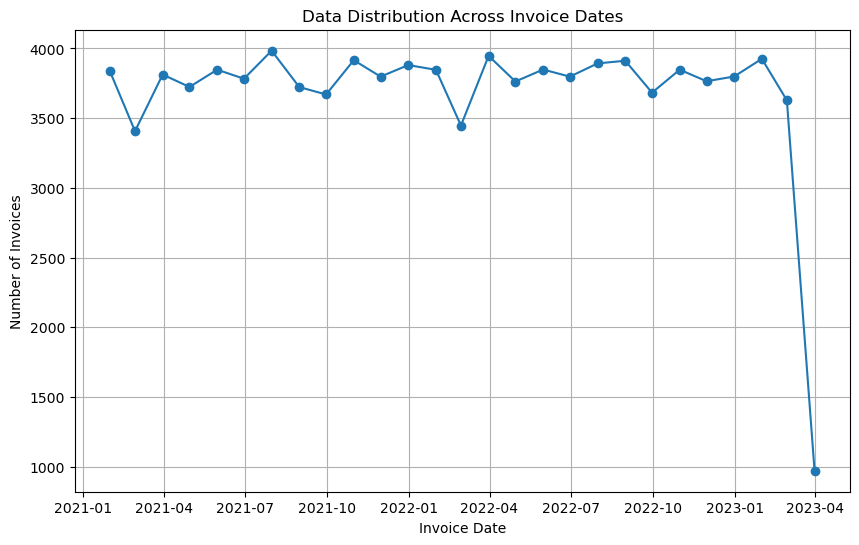

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("fct_invoice.csv")
df

df['invoice_date'] = pd.to_datetime(df['invoice_date'],format='%d/%m/%Y')

df.set_index('invoice_date', inplace=True)

monthly_invoice_count = df.resample('M').size()

plt.figure(figsize=(10, 6))
plt.plot(monthly_invoice_count, marker='o')
plt.xlabel('Invoice Date')
plt.ylabel('Number of Invoices')
plt.title('Data Distribution Across Invoice Dates')
plt.grid(True)
plt.show()


HARD:
1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [19]:
import pandas as pd

df = pd.read_csv("fct_invoice.csv")
df['total_rev'] = df['price']*df['quantity']
jsondf = pd.read_json("dim_customer.json")
df3 = pd.merge(df, jsondf, left_on="customer_id", right_on="id")


age_range = []
for age in df3['age']:
    if age >= 10 and age <= 19:
        age_range.append('10-19')
    elif age >= 20 and age <= 29:
        age_range.append('20-29')
    elif age >= 30 and age <= 39:
        age_range.append('30-39')
    elif age >= 40 and age <= 49:
        age_range.append('40-49')
    elif age >= 50 and age <= 59:
        age_range.append('50-59')
    elif age >= 60 and age <= 69:
        age_range.append('60-69')
    elif age >= 70 and age <= 79:
        age_range.append('70-79')
    elif age >= 80 and age <= 89:
        age_range.append('80-89')
    elif age >= 90 and age <= 99:
        age_range.append('90-99')
    else:
        age_range.append('NaN')

df3['age range'] = age_range
df3

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total_rev,age,first_name,gender,id,last_name,age range
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,NaN,William,M,229,Anderson,NaN
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,162.64,NaN,William,M,229,Anderson,NaN
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,5401.53,NaN,William,M,229,Anderson,NaN
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,2700.72,NaN,William,M,229,Anderson,NaN
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,15004.25,NaN,William,M,229,Anderson,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,600.17,NaN,Melissa,F,4973,Bell,NaN
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,378.75,36.0,Leslie,F,6161,Bass,30-39
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,7502.00,NaN,Kelly,F,6779,Roberts,NaN
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,1200.32,47.0,Shawn,M,8386,Perez,40-49


In [54]:
total_rev_age = pd.pivot_table(df3, values='total_rev', index='category', columns='age range', aggfunc='sum').reindex(sorted(pivot_table.columns), axis=1)

total_rev_age

age range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,NaN
category,,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00,334012.05
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00,46003764.40
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60,2777362.62
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93,345875.59
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60,26468097.17
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06,265661.04
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00,23865450.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80,1587210.24


In [52]:
frequency_age = pd.pivot_table(df3, values='total_rev', index='category', columns='age range', aggfunc='count').reindex(sorted(pivot_table.columns), axis=1)

frequency_age

age range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,NaN
category,,,,,,,,,
Books,75,475,507,510,462,466,351,174,1961
Clothing,563,3168,3389,3407,3085,3250,2349,1361,13915
Cosmetics,235,1355,1636,1487,1329,1441,942,596,6076
Food & Beverage,225,1342,1506,1567,1301,1430,951,555,5899
Shoes,153,902,1022,1033,875,884,676,380,4109
Souvenir,90,453,498,495,426,445,304,188,2100
Technology,85,458,528,524,388,501,309,178,2025
Toys,166,924,1076,1000,870,942,677,412,4020
